# Clustering analysis

Here we will code several clustering methods like: k-Means, DBSCAN and Agglomerative clustering using python library sklearn.

Here we shall use synthetic dataset.

## Create the dataset

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

We will create dataset with 3 clusters with 0.5 standard deviation for each cluster. Number of sample 300 and we also choose three points as centroids (centre of clusters).

In [2]:
# Determine centroids
centres = [[0.5, 2], [-1,-1], [1.5, -1]]

# Create dataset
X, y = make_blobs(n_samples=300, centers=centres, cluster_std=0.5, random_state=100)

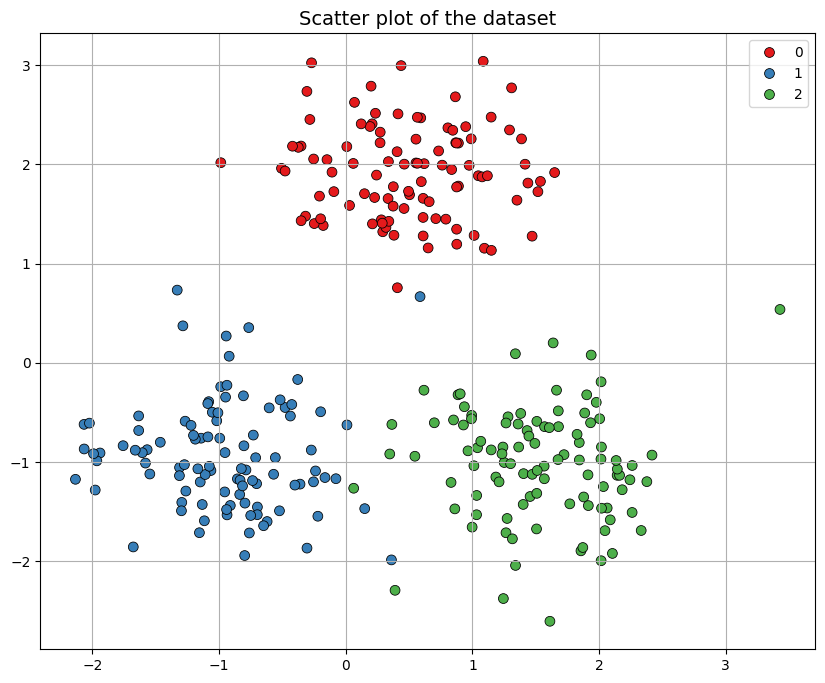

In [3]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='Set1', s=50, edgecolor='k')
plt.grid()
plt.legend()
plt.title("Scatter plot of the dataset", fontsize=14)
plt.show()

## Scale the dataset

In [4]:
X = StandardScaler().fit_transform(X)

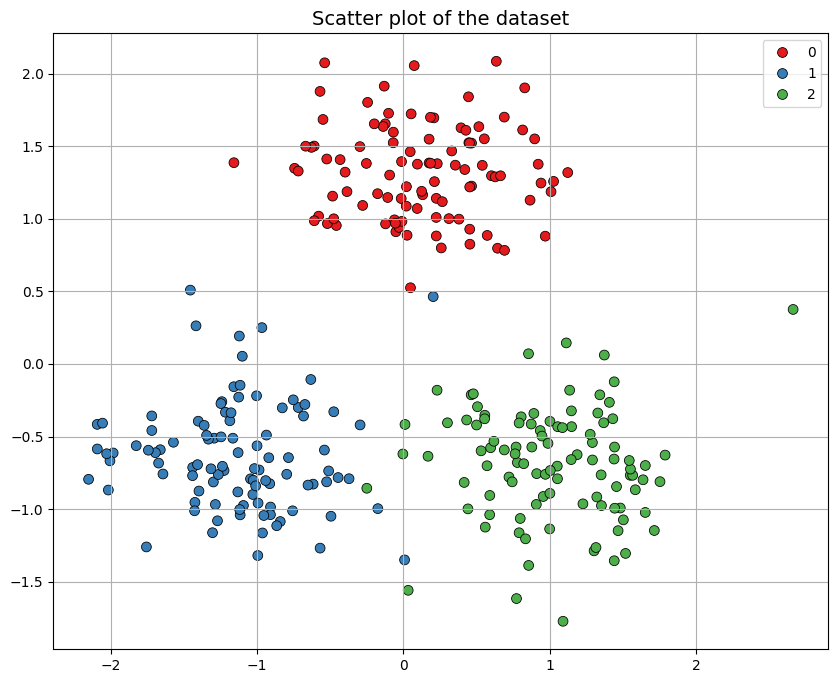

In [5]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='Set1', s=50, edgecolor='k')
plt.grid()
plt.title("Scatter plot of the dataset", fontsize=14)
plt.show()

## Apply k-means clustering

In [6]:
from sklearn.cluster import KMeans

### Finding optimal number of clusters in k-means (Elbow Method)

In [7]:
K = range(2, 10)

In [8]:
wcss_list = []

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    wcss = model.inertia_   # .inertia_ attribute will give us the WCSS
    wcss_list.append(wcss)

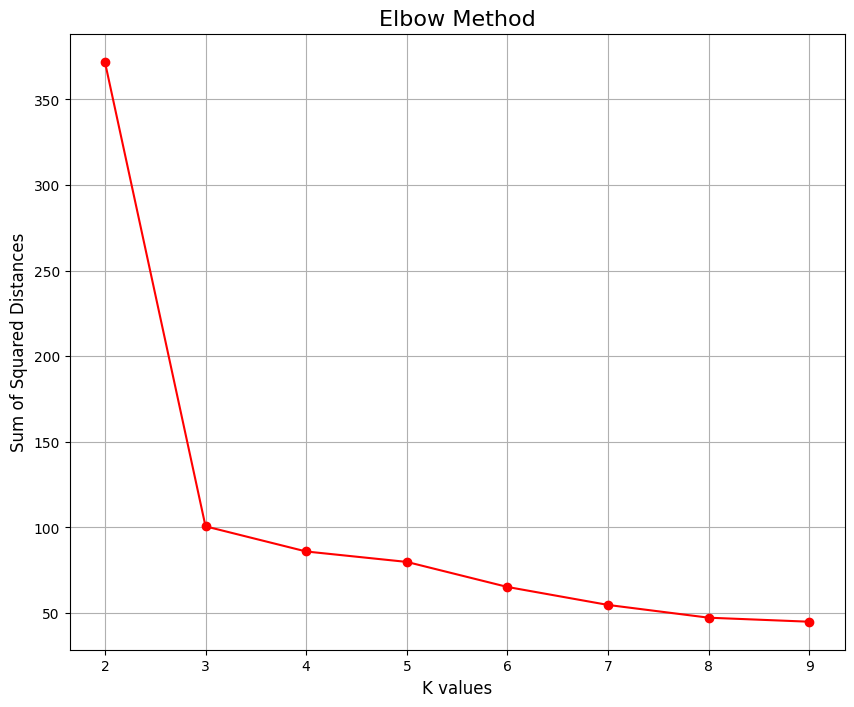

In [9]:
plt.figure(figsize=(10,8))
plt.plot(K, wcss_list, "ro-")
plt.xlabel("K values", fontsize=12)
plt.ylabel("Sum of Squared Distances",fontsize=12)
plt.title("Elbow Method",fontsize=16)
plt.grid()
plt.show()

So from our above exercise we can see that K=3 is the optimum number of cluster

### Fit the KMeans cluster with right value of k

In [10]:
model = KMeans(n_clusters=3)
model.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [11]:
labels = model.predict(X)

In [12]:
centroids = model.cluster_centers_

In [13]:
centroids

array([[ 1.01820081, -0.69176953],
       [ 0.1219279 ,  1.31300138],
       [-1.15287676, -0.64076956]])

In [14]:
centres

[[0.5, 2], [-1, -1], [1.5, -1]]

### Plot the output of kMeans clustering

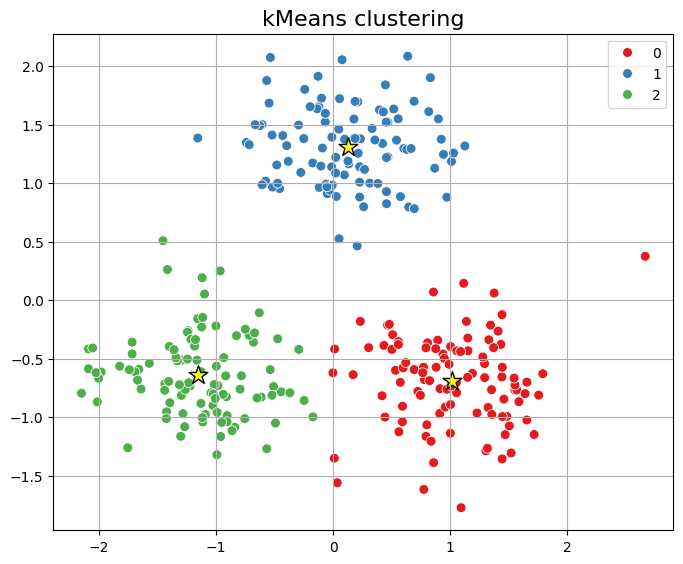

In [15]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette='Set1', s=50)
plt.scatter(centroids[:,0], centroids[:,1], c='yellow', s=200, marker='*', edgecolor='k')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.grid()
plt.title("kMeans clustering", fontsize=16)
plt.show()

### Obtain the Sihouette Score of the clusters

In [16]:
from sklearn.metrics import silhouette_score

In [17]:
s = silhouette_score(X, labels, metric='euclidean')

In [18]:
print(f"The Silhouette score of KMeans clustering: {s:0.2f}",)

The Silhouette score of KMeans clustering: 0.65


## Apply DBSCAN clustering

In [19]:
from sklearn.cluster import DBSCAN

### Determine eps and minPts

In [20]:
eps = 0.40
minPts = 16

### Create the DBSCAN model and fit it

In [21]:
dbscan_model = DBSCAN(eps=eps, min_samples=minPts)

In [22]:
dbscan_model.fit(X)

,eps,0.4
,min_samples,16
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [23]:
labels_dbscan = dbscan_model.fit_predict(X)

### Plot the output of DBSCAN

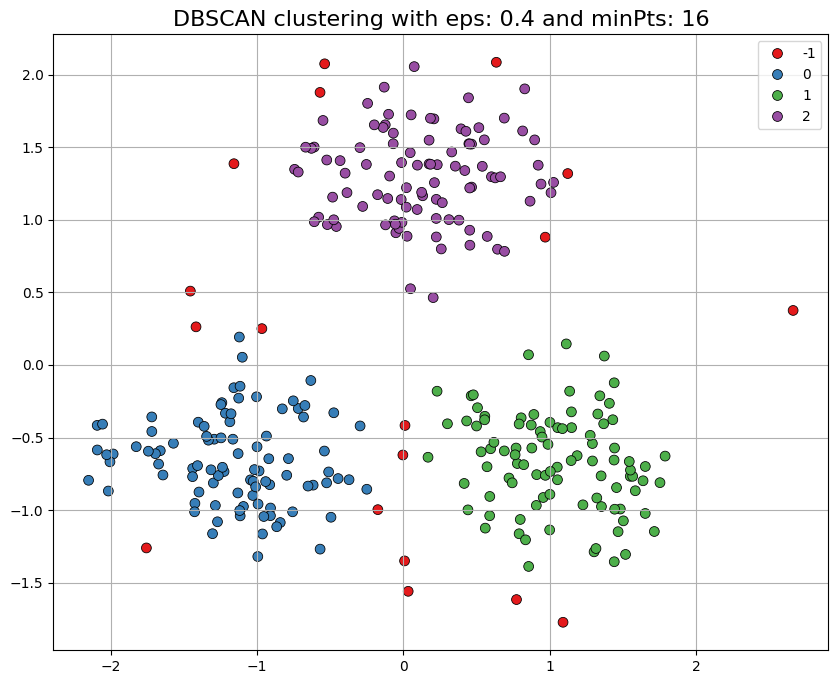

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels_dbscan, palette='Set1', s=50, edgecolor='k')
plt.title(f"DBSCAN clustering with eps: {eps} and minPts: {minPts}", fontsize=16)
plt.grid()
plt.show()

in this sklearn implementation of DBSCAN, label = -1 implies Noise points

### Obtain the silhouette score

In [25]:
print(f"The silhouette score: {silhouette_score(X, labels_dbscan, metric='euclidean'):0.2f}")

The silhouette score: 0.59


In [26]:
def noise_adjusted_silhouette_score(X, labels, metric='euclidean'):
    labels_wo_noise = labels[np.where(labels != -1)]
    X_wo_noise = X[np.where(labels != -1)]
    return silhouette_score(X_wo_noise, labels_wo_noise, metric=metric)

print(f"The silhouette score without noise points: {noise_adjusted_silhouette_score(X, labels_dbscan, metric='euclidean'):0.2f}")

The silhouette score without noise points: 0.68


### Methods for obtaining Optimal values of eps and MinPts based on Silhouette scores

In [27]:
range_of_eps = np.arange(0.1, 1.0, 0.1)
range_of_minPts = np.arange(5, 40, 5)

In [28]:
eps_minpts_comb = [(x,y) for x in range_of_eps for y in range_of_minPts]

In [29]:
def find_optimal_eps_minpts(values, noise_adjusted=True):
    best_score = -1
    for eps, minpts in values:
        dbscan_model = DBSCAN(eps=eps, min_samples=minpts)
        dbscan_model.fit(X)
        y_pred = dbscan_model.fit_predict(X)
        n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
        if n_clusters >= 2:
            if noise_adjusted:
                score = noise_adjusted_silhouette_score(X, labels=y_pred, metric='euclidean')
            else:
                score = silhouette_score(X, labels=y_pred, metric='euclidean')
            if score > best_score:
                best_score = score
                best_eps = eps
                best_minpts = minpts
    return best_eps, best_minpts, best_score

In [30]:
## Optimizing DBSCAN parameters with normal silhouette score
best_eps, best_minpts, best_score = find_optimal_eps_minpts(eps_minpts_comb, noise_adjusted=False)

print(f"The best eps: {best_eps}, best minPts: {best_minpts} with silhouette score: {best_score:0.2f}")

The best eps: 0.6, best minPts: 30 with silhouette score: 0.63


In [31]:
## Optimizing DBSCAN parameters with noise adjusted silhouette score
best_eps, best_minpts, best_score = find_optimal_eps_minpts(eps_minpts_comb, noise_adjusted=True)

print(f"The best eps: {best_eps:0.2f}, best minPts: {best_minpts} with noise adjusted silhouette score: {best_score:0.2f}")

The best eps: 0.30, best minPts: 25 with noise adjusted silhouette score: 0.83


### Optimal DBSCAN model

In [32]:
dbscan_model = DBSCAN(eps=0.6, min_samples=30)

In [33]:
y_pred = dbscan_model.fit_predict(X)

In [34]:
print(f"The silhouette score: {silhouette_score(X, y_pred, metric='euclidean'):0.2f}")
print(f"The noise adjusted silhouette score: {noise_adjusted_silhouette_score(X, y_pred, metric='euclidean'):0.2f}")

The silhouette score: 0.63
The noise adjusted silhouette score: 0.65


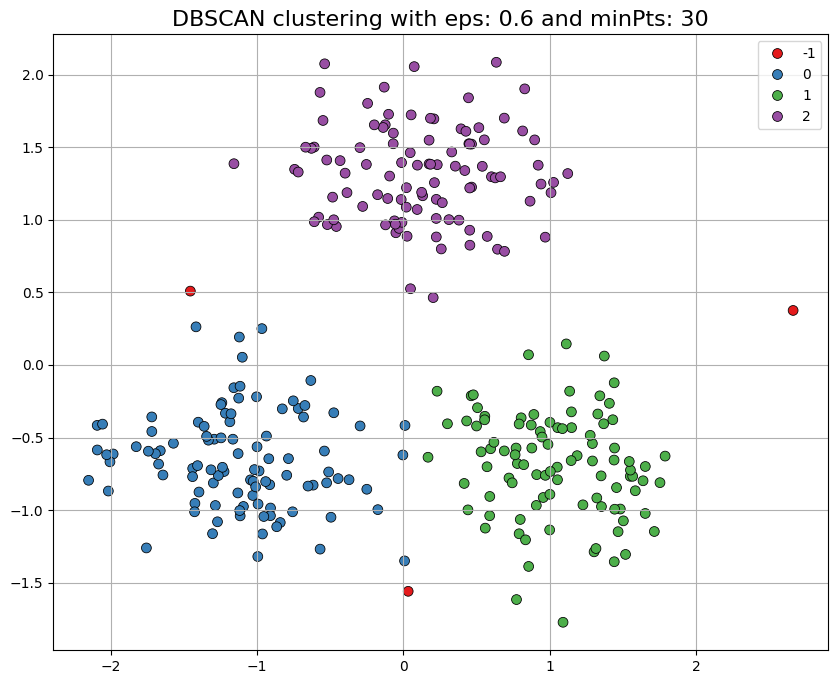

In [35]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred, palette='Set1', s=50, edgecolor='k')
plt.title(f"DBSCAN clustering with eps: 0.6 and minPts: 30", fontsize=16)
plt.grid()
plt.show()

## Agglomeartive Clustering

In [36]:
from sklearn.cluster import AgglomerativeClustering

### Create agglomearive clustering model and fit it

In [37]:
agg_cluster = AgglomerativeClustering(n_clusters=3)

In [38]:
y_pred_agg = agg_cluster.fit_predict(X)

### Plot the output of Agglomerative Clustering

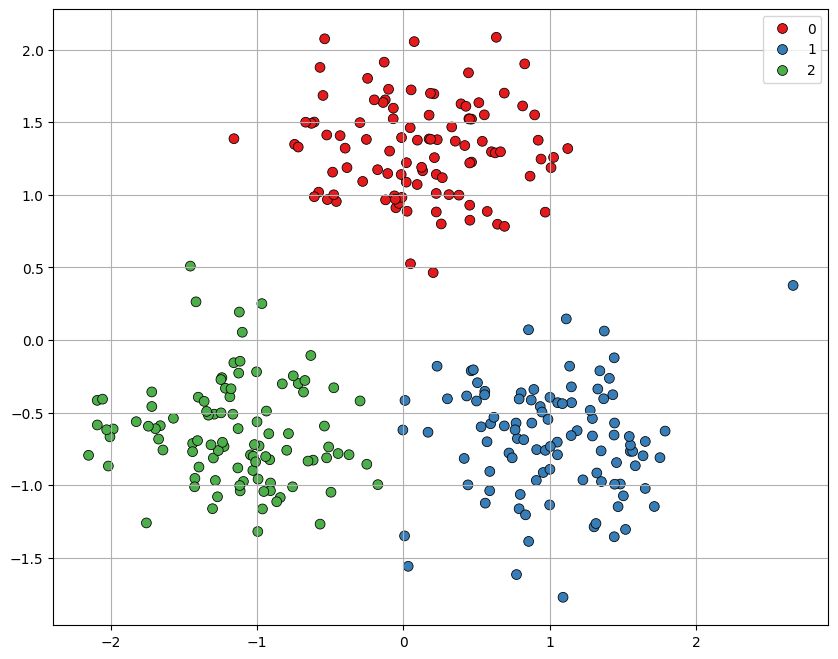

In [39]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred_agg, palette='Set1', s=50, edgecolor='k')
plt.grid()
plt.show()

### Silhoutte score of Agglomerative Clustering

In [40]:
silhouette_score(X, y_pred_agg, metric='euclidean')

0.6472412342728544

### Visualizing the dendograms of Agglomerative Clustering

[scipy.cluster.hierarchy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)

In [41]:
import scipy.cluster.hierarchy as shc

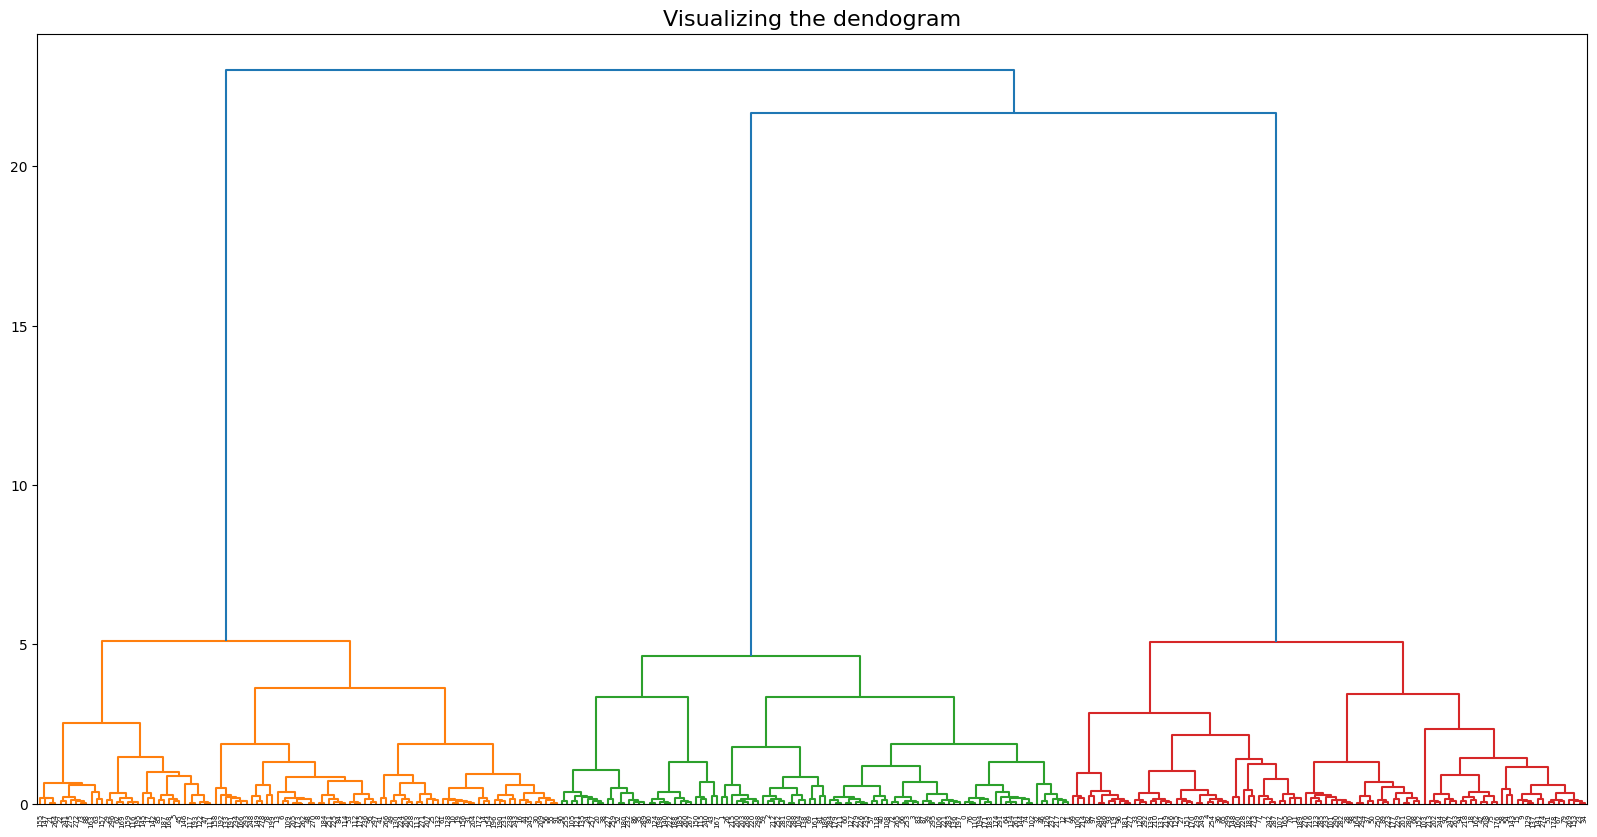

In [42]:
plt.figure(figsize=(20,10))
Dendogram = shc.dendrogram((shc.linkage(X, method='ward')))
plt.title("Visualizing the dendogram", size=16)
plt.show()